In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [133]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.externals import joblib
import matplotlib.pyplot as plt

In [134]:
weather = pd.read_csv('/content/gdrive/My Drive/capstone1/weather.csv',encoding='CP949')
weather.head()

datetime  temperature  ...  hour  generation
0  2017-01-01 1:00          5.0  ...   NaN         NaN
1  2017-01-01 2:00          4.1  ...   NaN         NaN
2  2017-01-01 3:00          3.3  ...   NaN         NaN
3  2017-01-01 4:00          2.5  ...   NaN         NaN
4  2017-01-01 5:00          2.1  ...   NaN         NaN

[5 rows x 16 columns]

In [135]:
generation=pd.read_csv('/content/gdrive/My Drive/capstone1/Gen_data.csv',encoding='CP949')
generation.head()

Date  1:00  2:00  3:00  4:00  ...  20:00  21:00  22:00  23:00  0:00
0  2017-01-01     0     0   0.0     0  ...      0      0      0      0     0
1  2017-01-02     0     0   0.0     0  ...      0      0      0      0     0
2  2017-01-03     0     0   0.0     0  ...      0      0      0      0     0
3  2017-01-04     0     0   0.0     0  ...      0      0      0      0     0
4  2017-01-05     0     0   0.0     0  ...      0      0      0      0     0

[5 rows x 25 columns]

In [136]:
def merge_data(g_data, w_data):
    temp_data = w_data
    for index in g_data.index:
        for hour in range(0, 24):
            if hour == 23:
                temp_data.iloc[index*24 + hour, 14] = 0    
            else:
                temp_data.iloc[index*24 + hour, 14] = hour + 1
            temp_data.iloc[index*24 + hour, 15] = g_data.iloc[index, hour + 1]
    return temp_data.fillna(0)

In [137]:
total_data = merge_data(generation, weather)
total_data.to_csv('/content/gdrive/My Drive/capstone1/total_data.csv', mode='w')

In [138]:
load_data = pd.read_csv('/content/gdrive/My Drive/capstone1/total_data.csv')

columns=['temperature', 'windspeed', 'wind_direction', 'humidity', 'sunlight', 
         'sunlight_QC', 'radiation', 'total_cloud', 'medium_low_cloud', 
         'minimum_ceiling_cloud', 'visibility', 'ground_temperature', 
         'underground_temperature', 'hour','generation']

total_data=load_data[columns]
total_data.index=load_data['datetime']
total_data.head()

temperature  windspeed  ...  hour  generation
datetime                                 ...                  
2017-01-01 1:00          5.0        1.8  ...   1.0         0.0
2017-01-01 2:00          4.1        0.8  ...   2.0         0.0
2017-01-01 3:00          3.3        1.5  ...   3.0         0.0
2017-01-01 4:00          2.5        1.8  ...   4.0         0.0
2017-01-01 5:00          2.1        1.8  ...   5.0         0.0

[5 rows x 15 columns]

In [139]:
col=total_data.columns
ind=total_data.index.values

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(total_data)

normalized_total_data_sc=min_max_scaler.transform(total_data)
normalized_total_data = pd.DataFrame(normalized_total_data_sc,columns=col,index=list(ind))
max_gen = min_max_scaler.data_max_[14]

normalized_total_data.head()

temperature  windspeed  ...      hour  generation
2017-01-01 1:00     0.339623   0.104651  ...  0.043478         0.0
2017-01-01 2:00     0.320755   0.046512  ...  0.086957         0.0
2017-01-01 3:00     0.303983   0.087209  ...  0.130435         0.0
2017-01-01 4:00     0.287212   0.104651  ...  0.173913         0.0
2017-01-01 5:00     0.278826   0.104651  ...  0.217391         0.0

[5 rows x 15 columns]

In [140]:
feature =['temperature', 'windspeed', 'wind_direction', 'humidity', 'sunlight', 
         'sunlight_QC', 'radiation', 'total_cloud', 'medium_low_cloud', 
         'minimum_ceiling_cloud', 'visibility', 'ground_temperature', 
         'underground_temperature', 'hour']
T_data=normalized_total_data[feature]
T_label=normalized_total_data["generation"]

X_train, X_test, y_train, y_test = train_test_split(T_data, T_label, 
                                                    test_size=0.2, shuffle=False, 
                                                    random_state=1000)

In [141]:
columns_f=['temperature', 'windspeed', 'wind_direction', 'humidity', 'hour', 
           'generation']

total_data_f=load_data[columns_f]
total_data_f.index=load_data['datetime']
total_data_f.head()

temperature  windspeed  ...  hour  generation
datetime                                 ...                  
2017-01-01 1:00          5.0        1.8  ...   1.0         0.0
2017-01-01 2:00          4.1        0.8  ...   2.0         0.0
2017-01-01 3:00          3.3        1.5  ...   3.0         0.0
2017-01-01 4:00          2.5        1.8  ...   4.0         0.0
2017-01-01 5:00          2.1        1.8  ...   5.0         0.0

[5 rows x 6 columns]

In [142]:
col_f=total_data_f.columns
ind_f=total_data_f.index.values

min_max_scaler_f = MinMaxScaler()
min_max_scaler_f.fit(total_data_f)

normalized_total_data_f = min_max_scaler_f.transform(total_data_f)
normalized_total_data_f = pd.DataFrame(normalized_total_data_f,columns=col_f,index=list(ind_f))
normalized_total_data_f.head()

feature_f=['temperature', 'windspeed', 'wind_direction', 'humidity', 'hour']
T_data_f=normalized_total_data_f[feature_f]
T_label_f=normalized_total_data_f["generation"]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(T_data_f, T_label_f, 
                                                    test_size=0.2, shuffle=False, 
                                                    random_state=1000)

In [163]:
def knn_model(k, x_train, y_train, name=''):
  #k=156(dataset의 제곱근) knn 모델
  regressor_k = KNeighborsRegressor(n_neighbors=k,weights="distance") 
  regressor_k.fit(x_train,y_train)

  k_filename='/content/gdrive/My Drive/capstone1/k%i_%s.pkl'%(k,name)
  joblib.dump(regressor_k,k_filename)

  return regressor_k

def knn_model_read(k, name=''):
  k_filename='/content/gdrive/My Drive/capstone1/k%i_%s.pkl'%(k,name)
  k_from_file=joblib.load(k_filename)
  return k_from_file

def svr_model(C, eps, x_train, y_train, name=''):
  svr=SVR(kernel='poly', C=C, gamma='auto', degree=6, epsilon = eps, coef0=1)
  svr.fit(x_train,y_train)

  svr_filename='/content/gdrive/My Drive/capstone1/svr_c%i_e%i_%s.pkl'%(C,eps*100,name)
  joblib.dump(svr,svr_filename)

  return svr

def svr_model_read(C, eps, name=''):
  svr_filename='/content/gdrive/My Drive/capstone1/svr_c%i_e%i_%s.pkl'%(C,eps*100,name)
  svr_from_file=joblib.load(svr_filename)
  return svr_from_file

def print_model_all(model, x_test, y_test):
  output = model.predict(x_test)
  output = output.clip(min=0)
  output = pd.DataFrame(output, index=y_test.index.values)
  result = pd.merge(output, y_test, left_index = True, right_index = True, 
                    how='left') 
  result.columns=["predicted future","real future"]
  result.plot(figsize=(100,30), linewidth=3.0)
  print('R2 score : ' + str(r2_score(y_test,output))) #r2 score

def print_model_sample(model, x_test, y_test, sample_num):
  output = model.predict(x_test)
  output = output.clip(min=0)
  output = pd.DataFrame(output, index=y_test.index.values)
  result = pd.merge(output, y_test, left_index = True, right_index = True, 
                    how='left')

  sample = result.sample(n=sample_num) 
  result.columns=["predicted future","real future"]
  sample.plot(figsize=(100,30), linewidth=3.0)
  print('R2 score : ' + str(r2_score(y_test,output))) #r2 score

R2 score : 0.9620848946800717


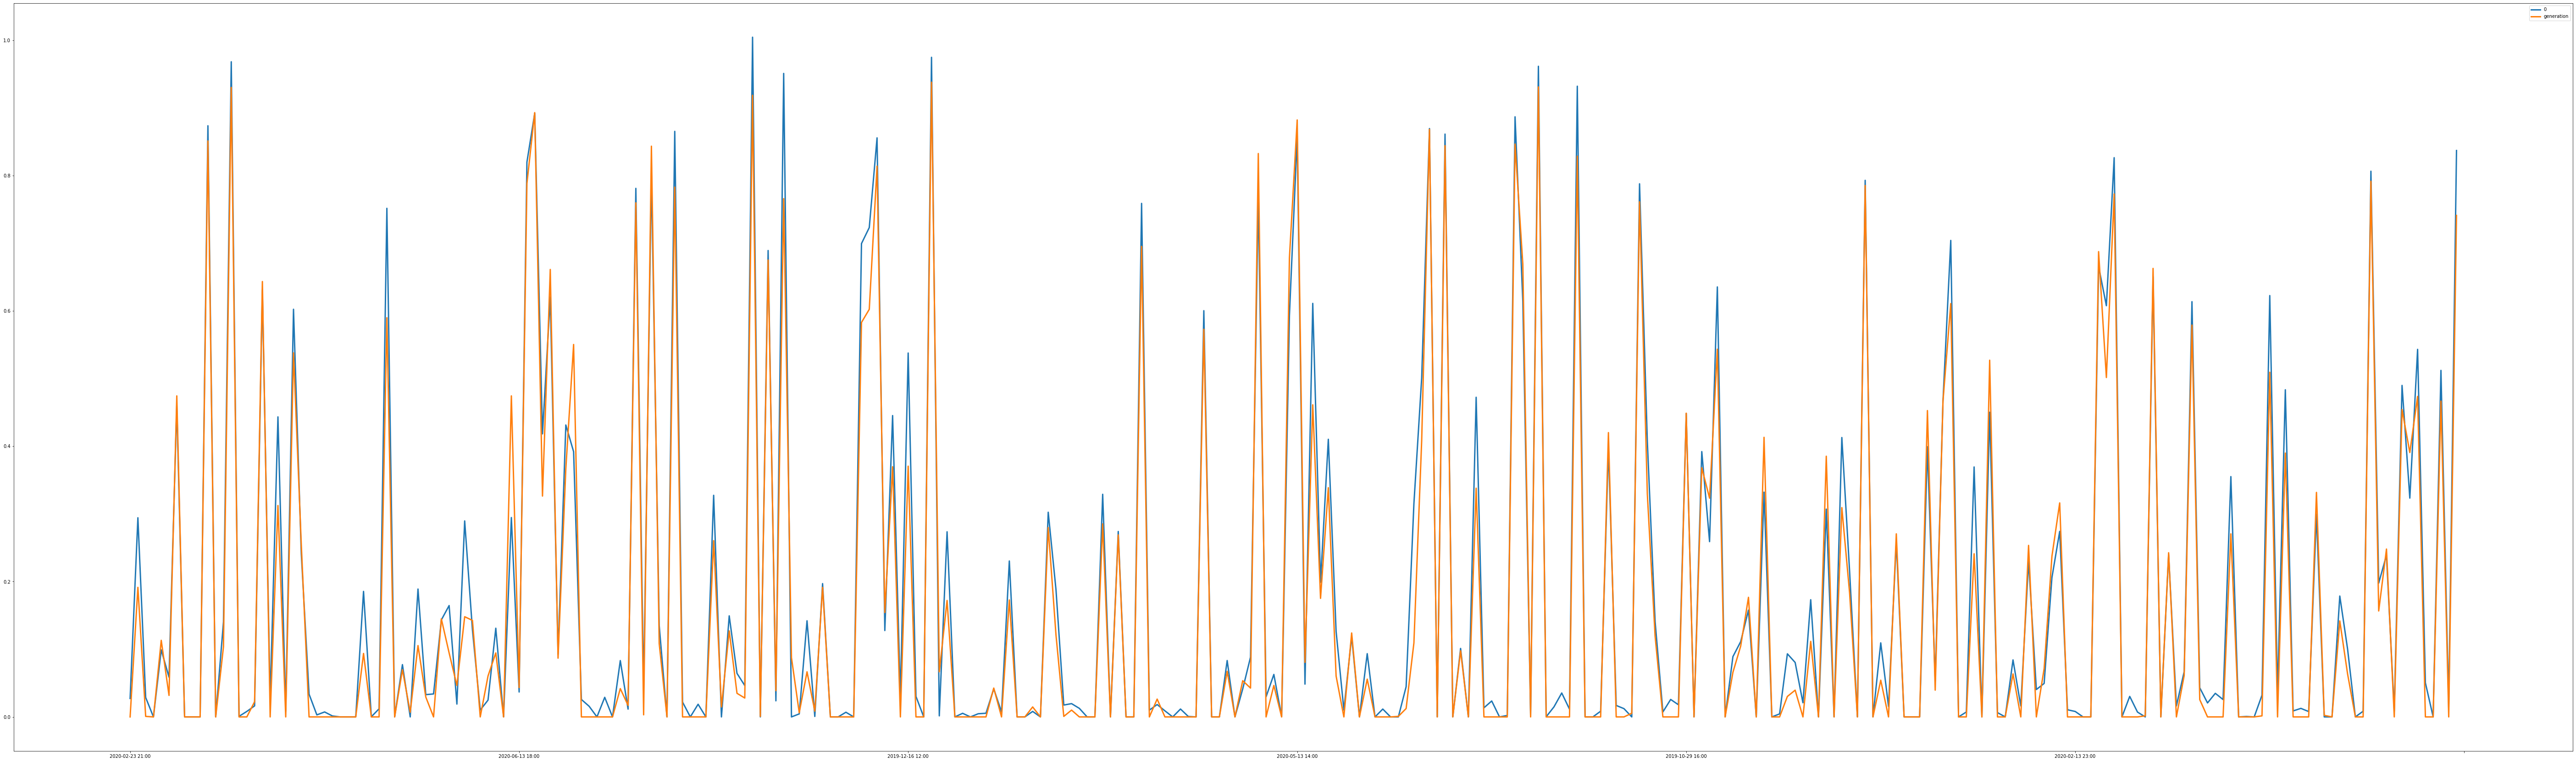

In [157]:
svr_c300_e005 = svr_model(300, 0.05, X_train, y_train)
print_model_sample(svr_c300_e005, X_test, y_test, 300)

R2 score : 0.8276816415881607


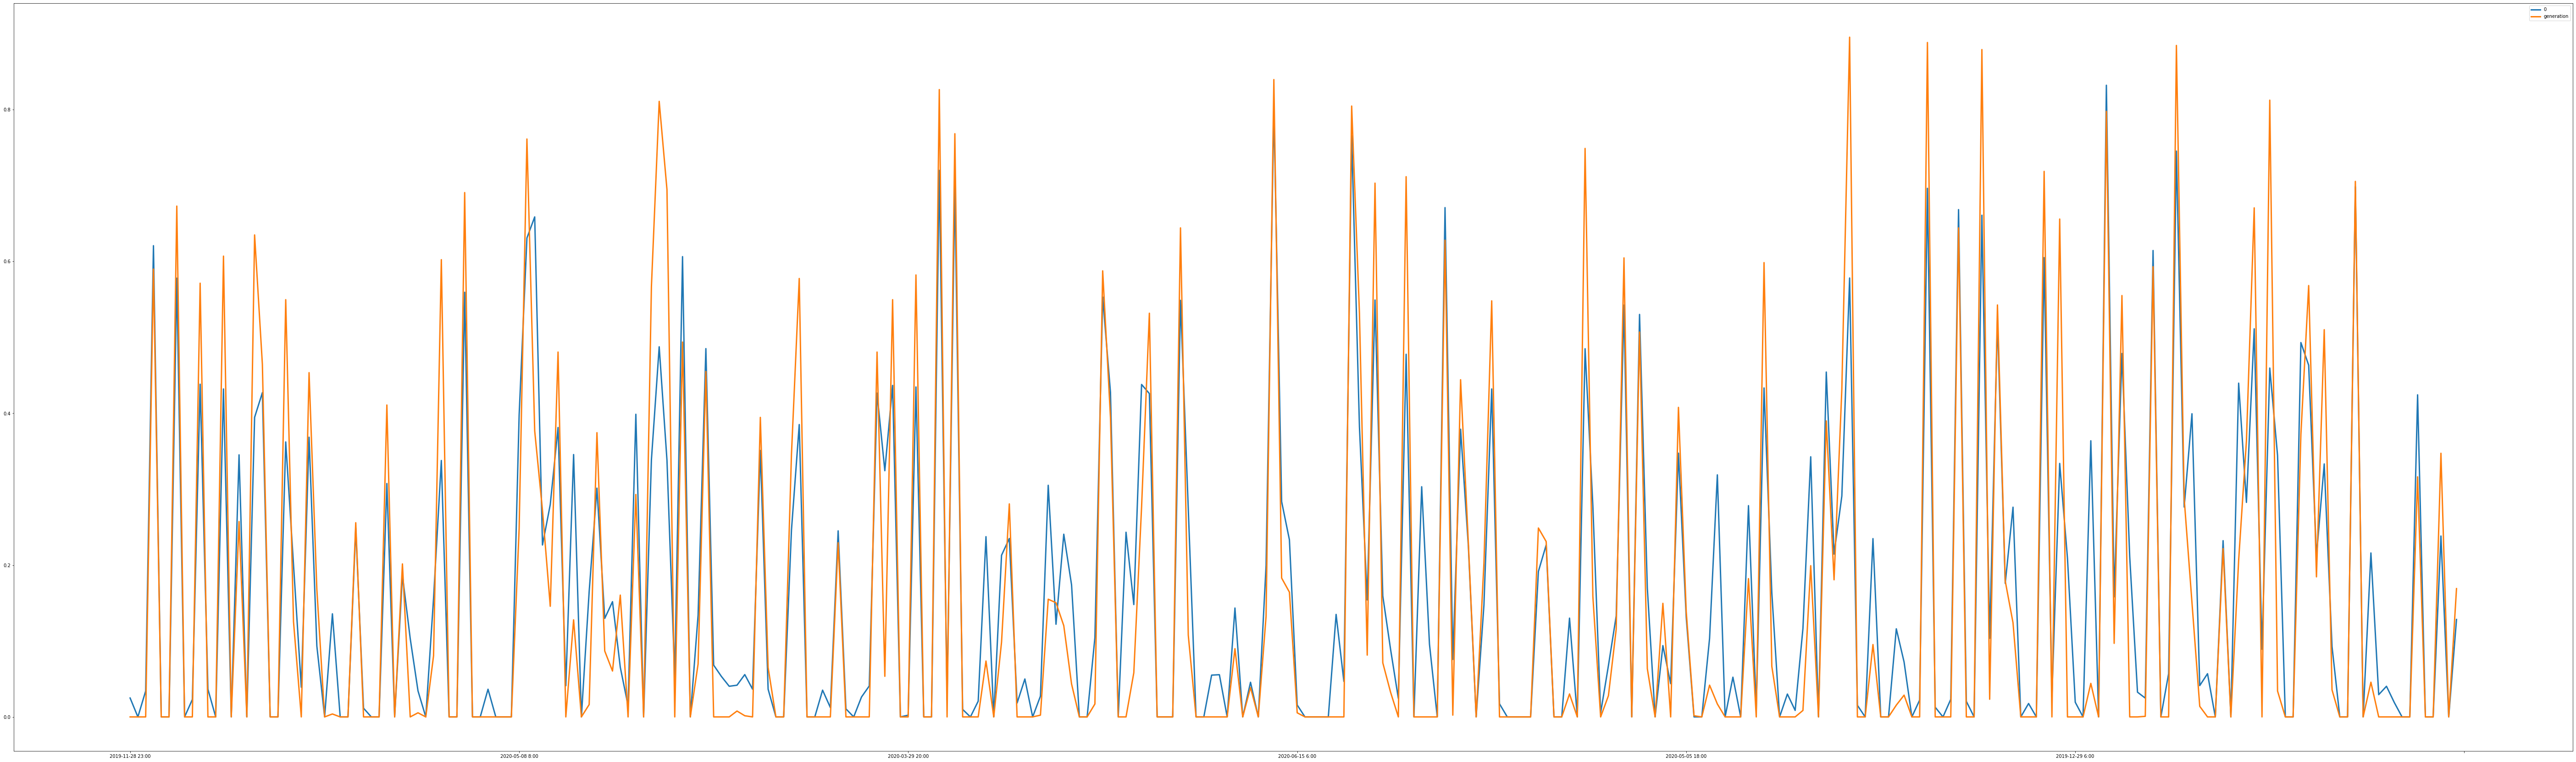

In [158]:
svr_c300_e005_f = svr_model(300, 0.05, X_train_f, y_train_f,'f')
print_model_sample(svr_c300_e005_f, X_test_f, y_test_f, 300)

R2 score : 0.8510365251771853


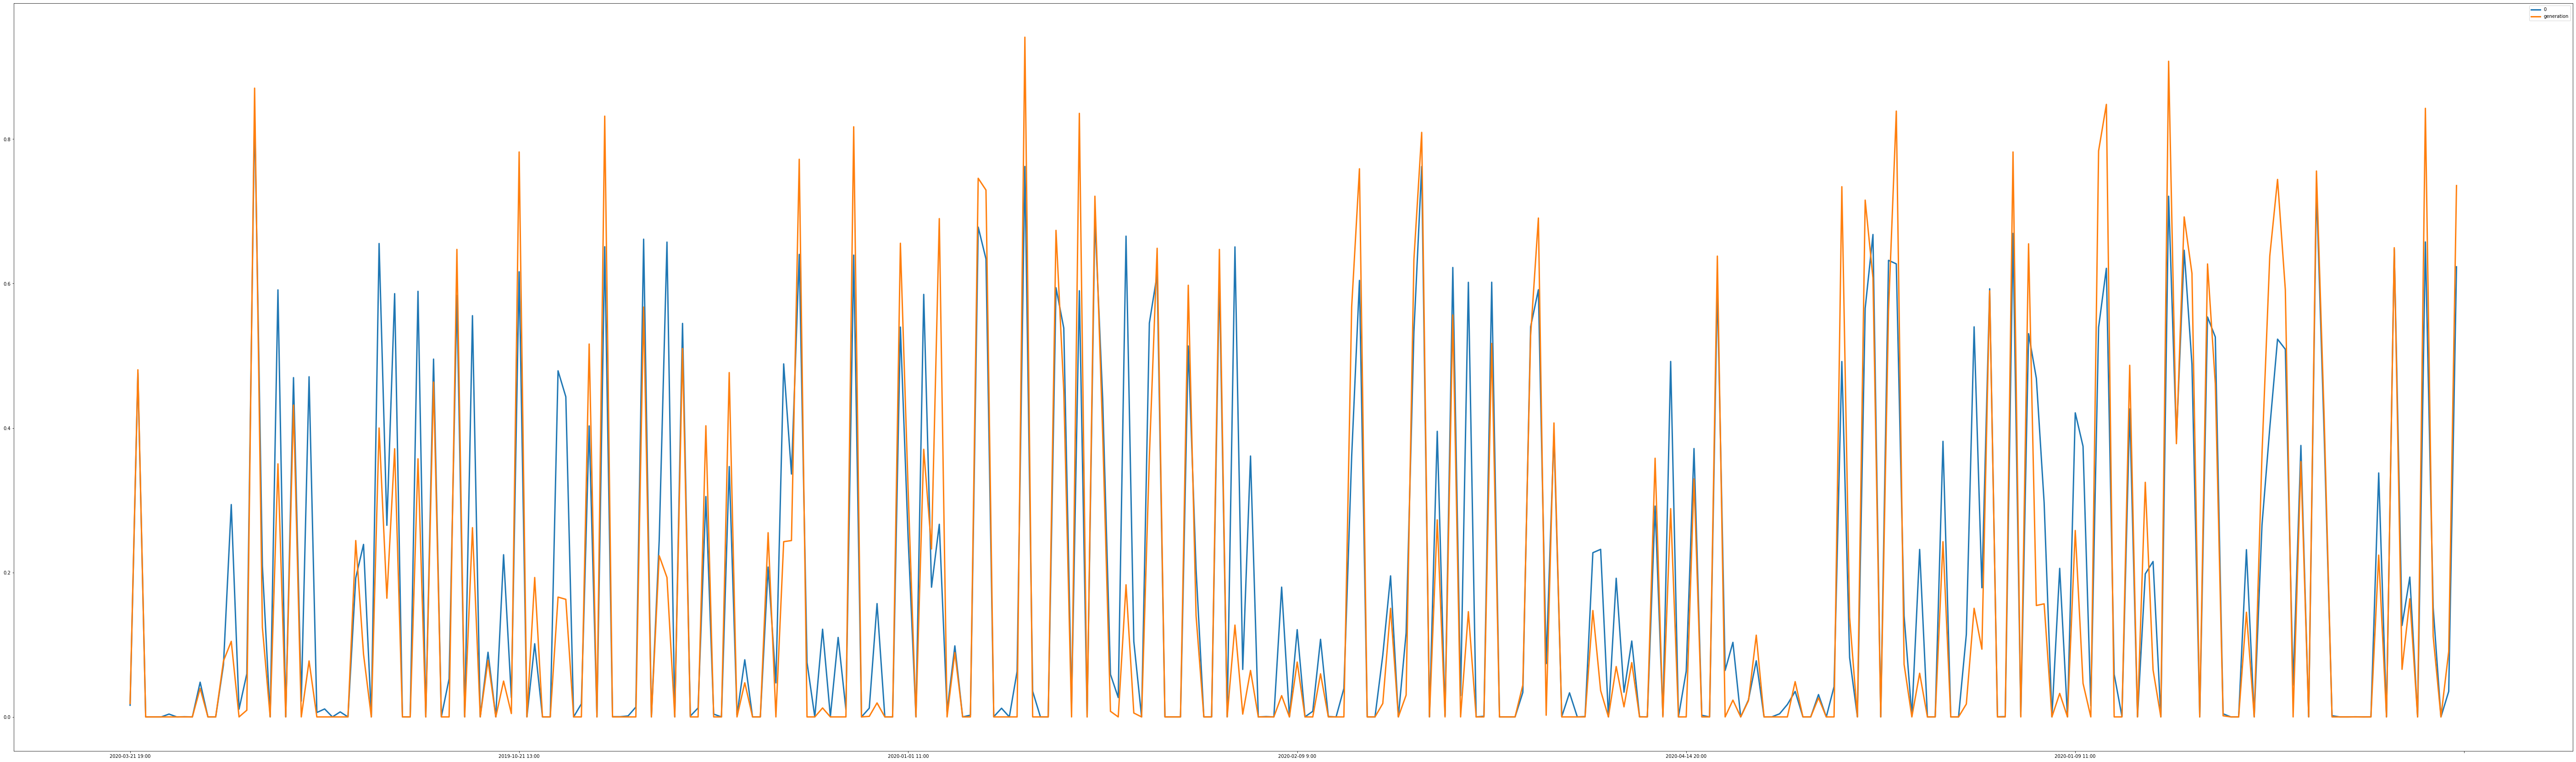

In [165]:
k50_f = knn_model(50, X_train_f, y_train_f,'f')
print_model_sample(k50_f, X_test_f, y_test_f, 300)

R2 score : 0.9620848946800717


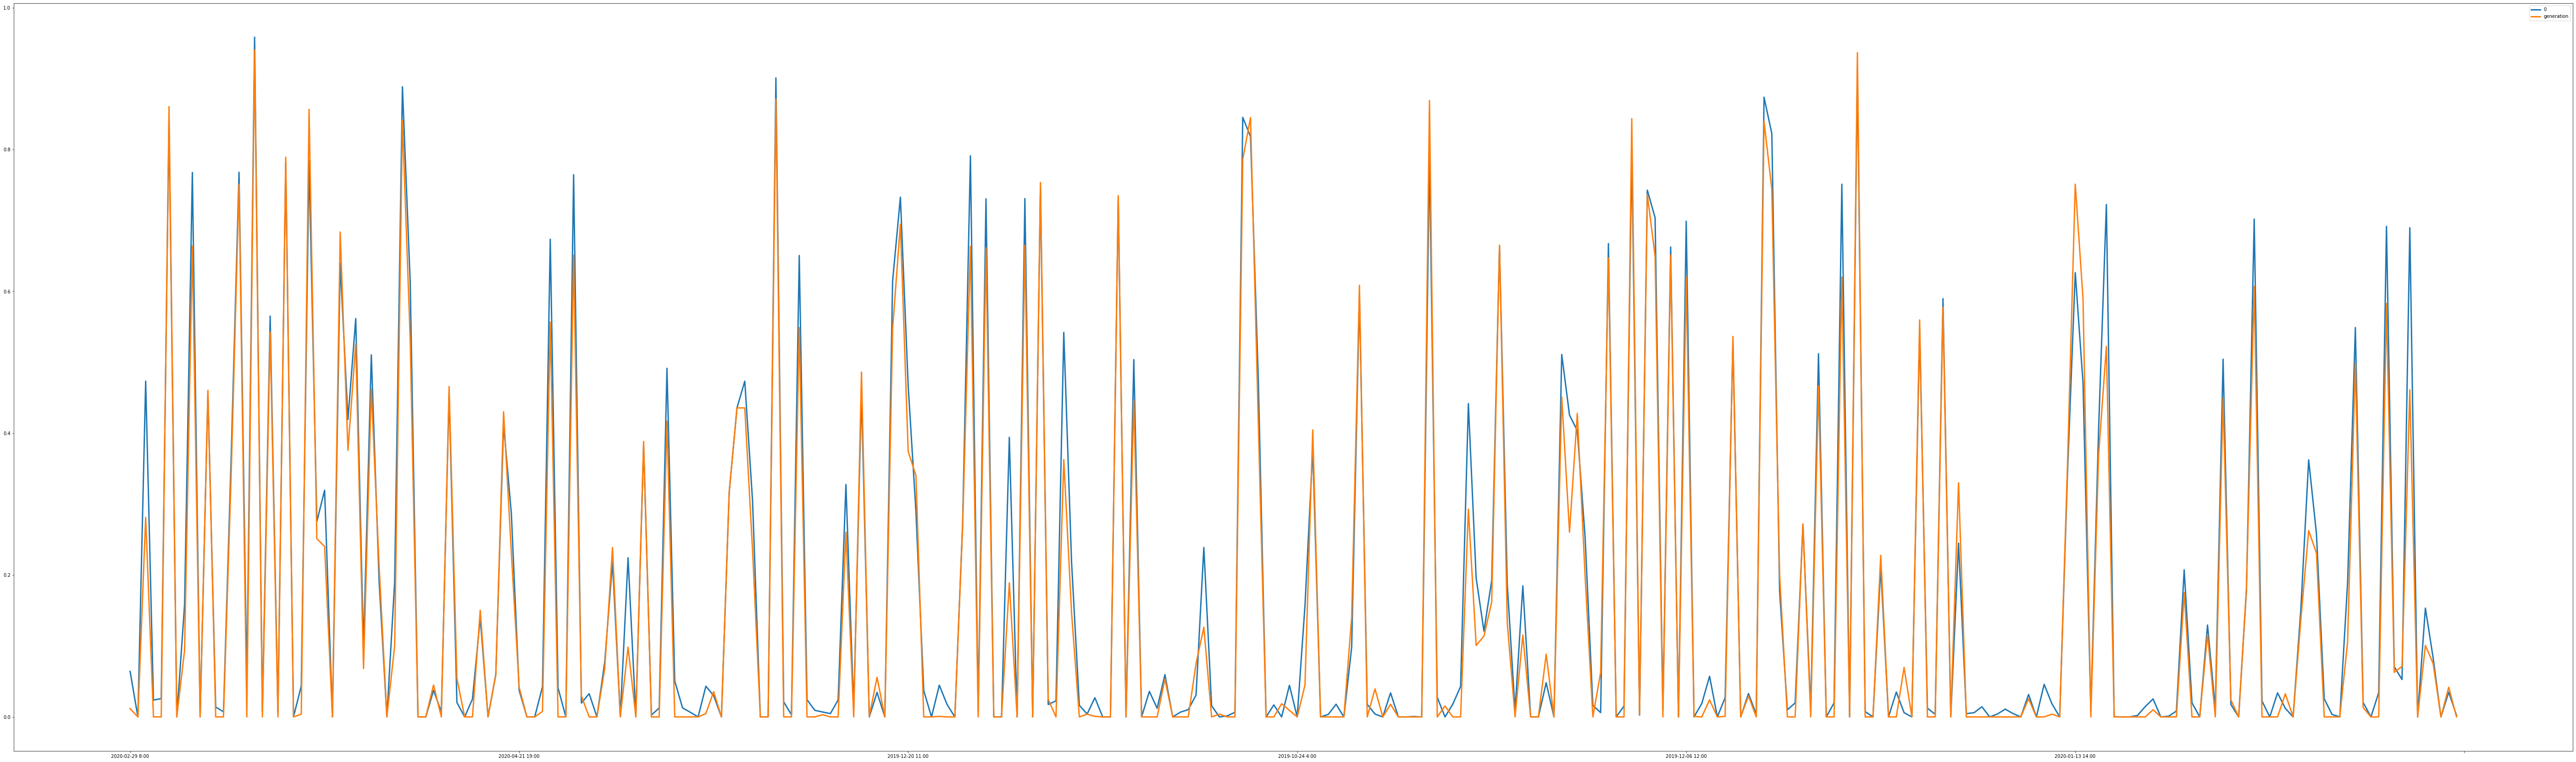

In [153]:
svr_c300_e005_r = svr_model_read(300,0.05)
print_model_sample(svr_c300_e005_r, X_test, y_test, 300)

R2 score : 0.8510365251771853


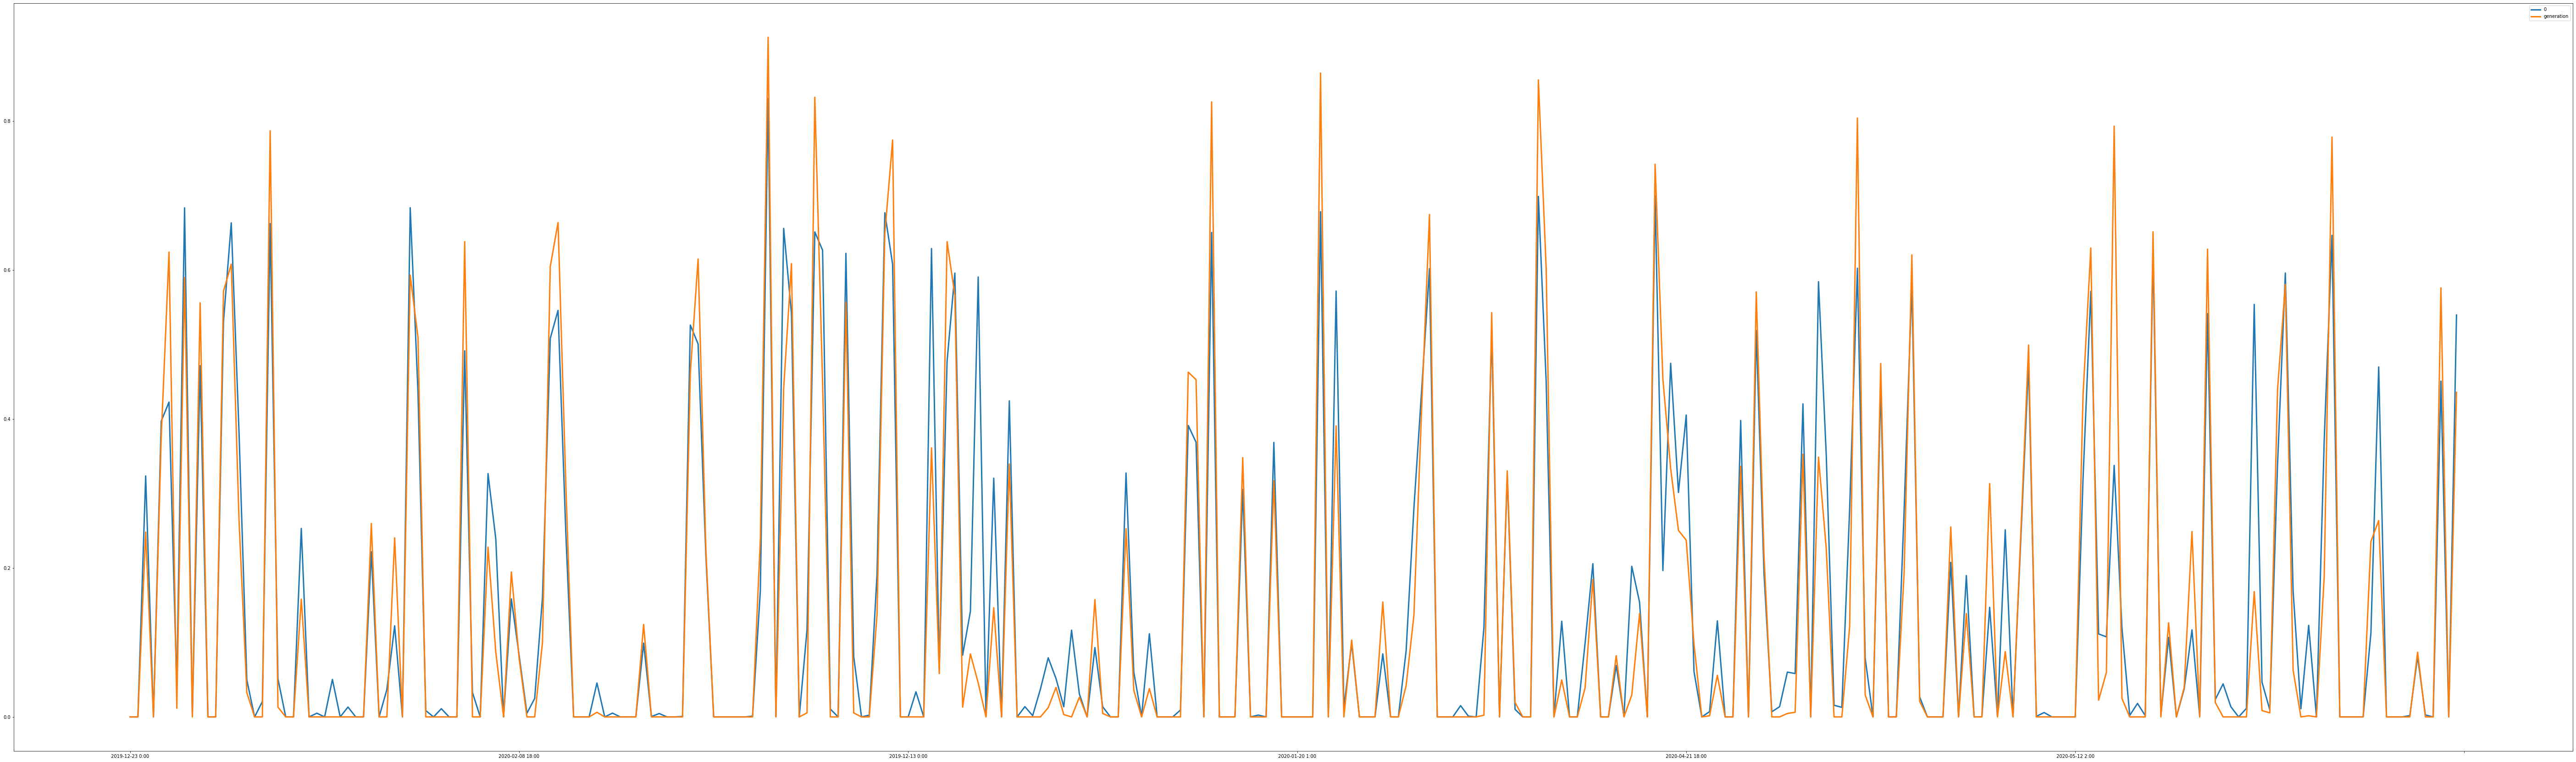

In [147]:
k50_f_r = knn_model_read(50,'f')
print_model_sample(k50_f_r, X_test_f, y_test_f, 300)

R2 score : 0.8276816415881607


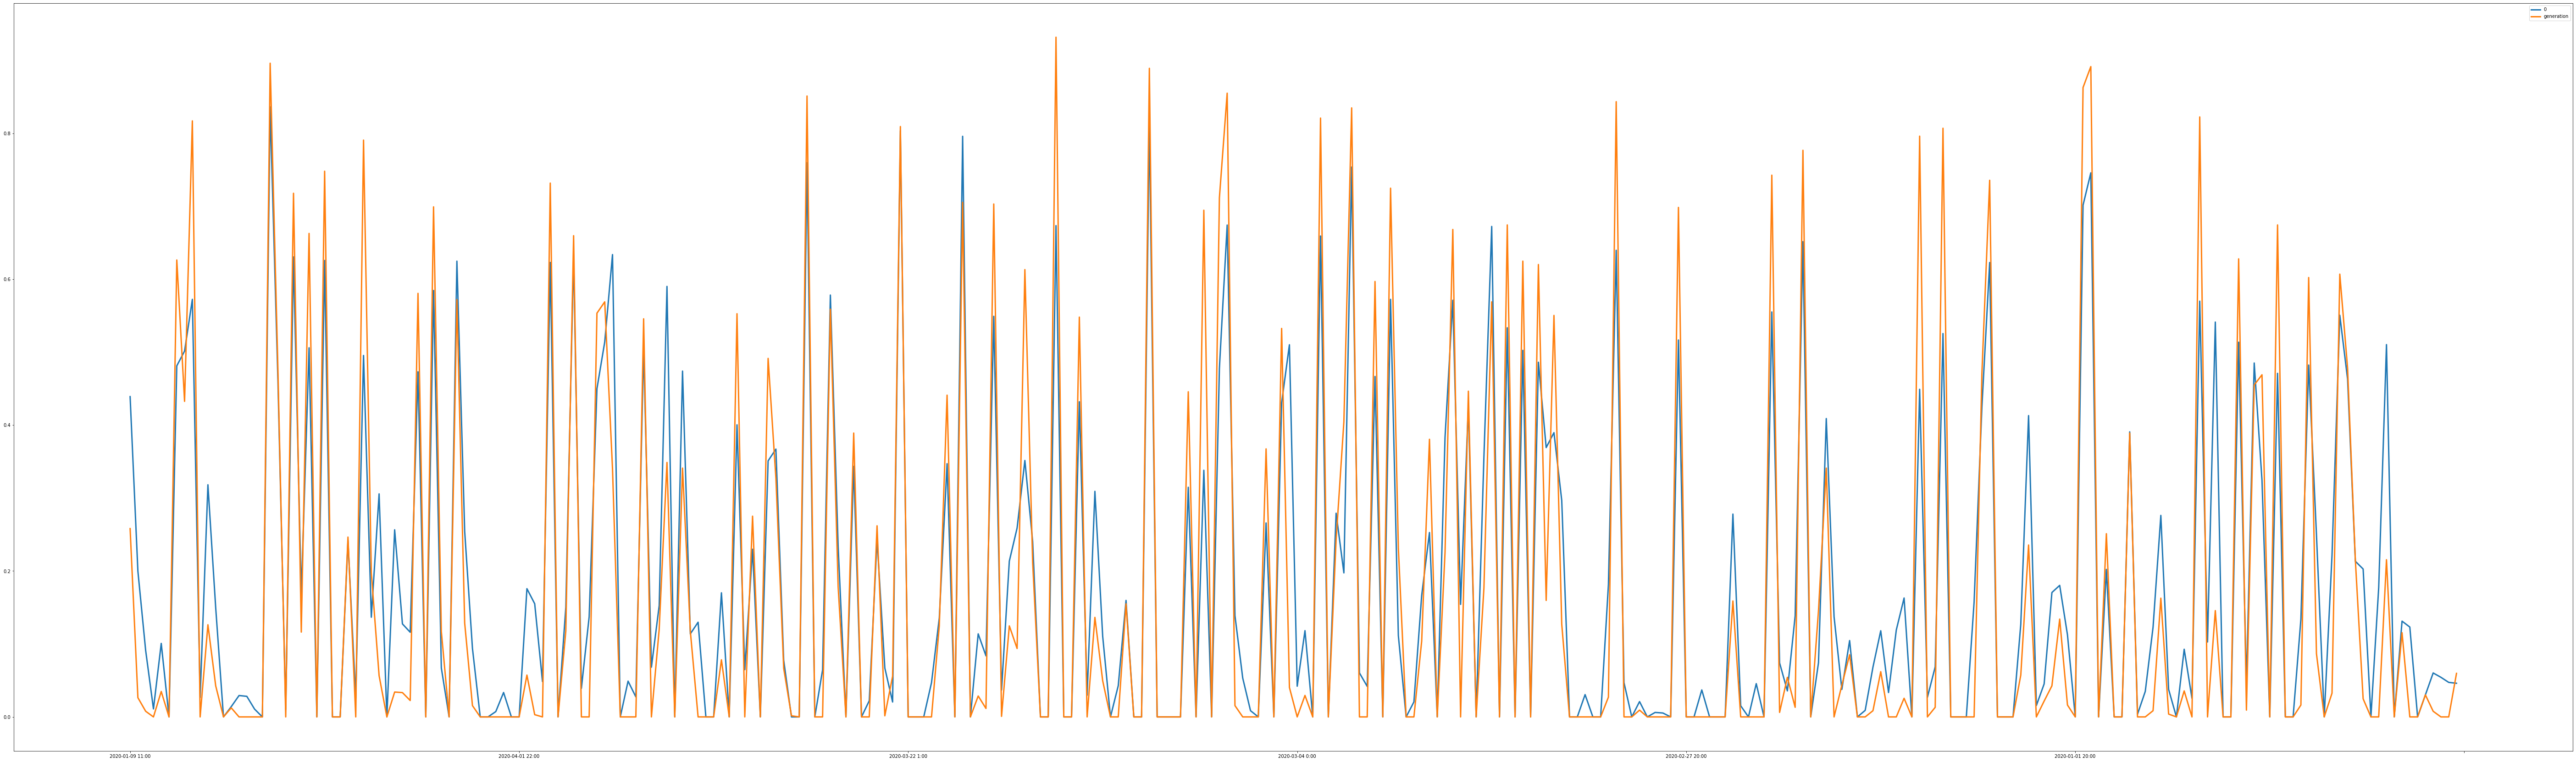

In [160]:
svr_c300_e005_f_r = svr_model_read(300, 0.05, 'f')
print_model_sample(svr_c300_e005_f_r, X_test_f, y_test_f, 300)

In [ ]:
last_day = pd.read_csv('/content/gdrive/My Drive/capstone1/last_day.csv')
last_day.drop('Unnamed: 0', axis=1, inplace=True)
last_day.index = last_day['datetime']
last_day = last_day[columns_f]
normalized_last_day = min_max_scaler_f.transform(last_day)
normalized_last_day = pd.DataFrame(normalized_total_data_f,columns=columns_f,index=list(last_day.index.values))
last_day_weather = normalized_last_day[feature_f]
last_day_generation = normalized_last_day['generation']

R2 score : 0.9277868598497823


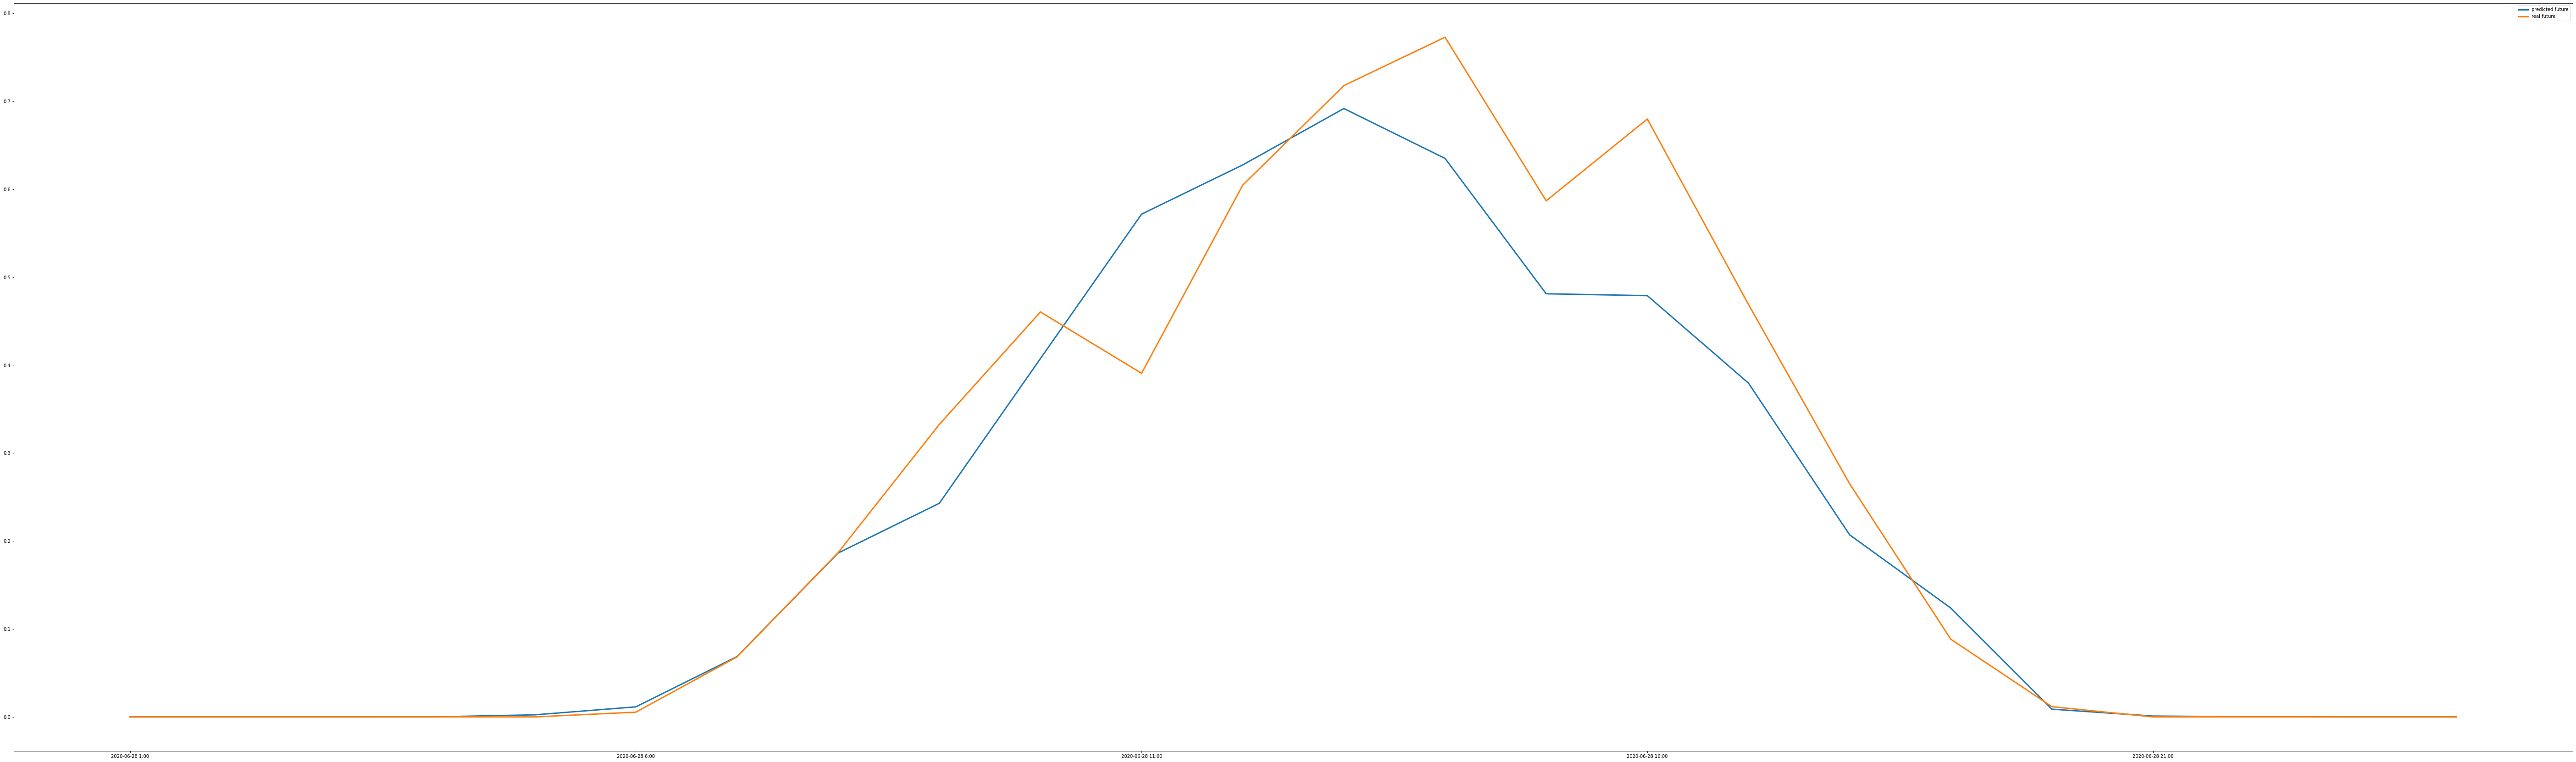

In [161]:
print_model_all(k50_f_r, last_day_weather, last_day_generation)

R2 score : 0.8586615350288826


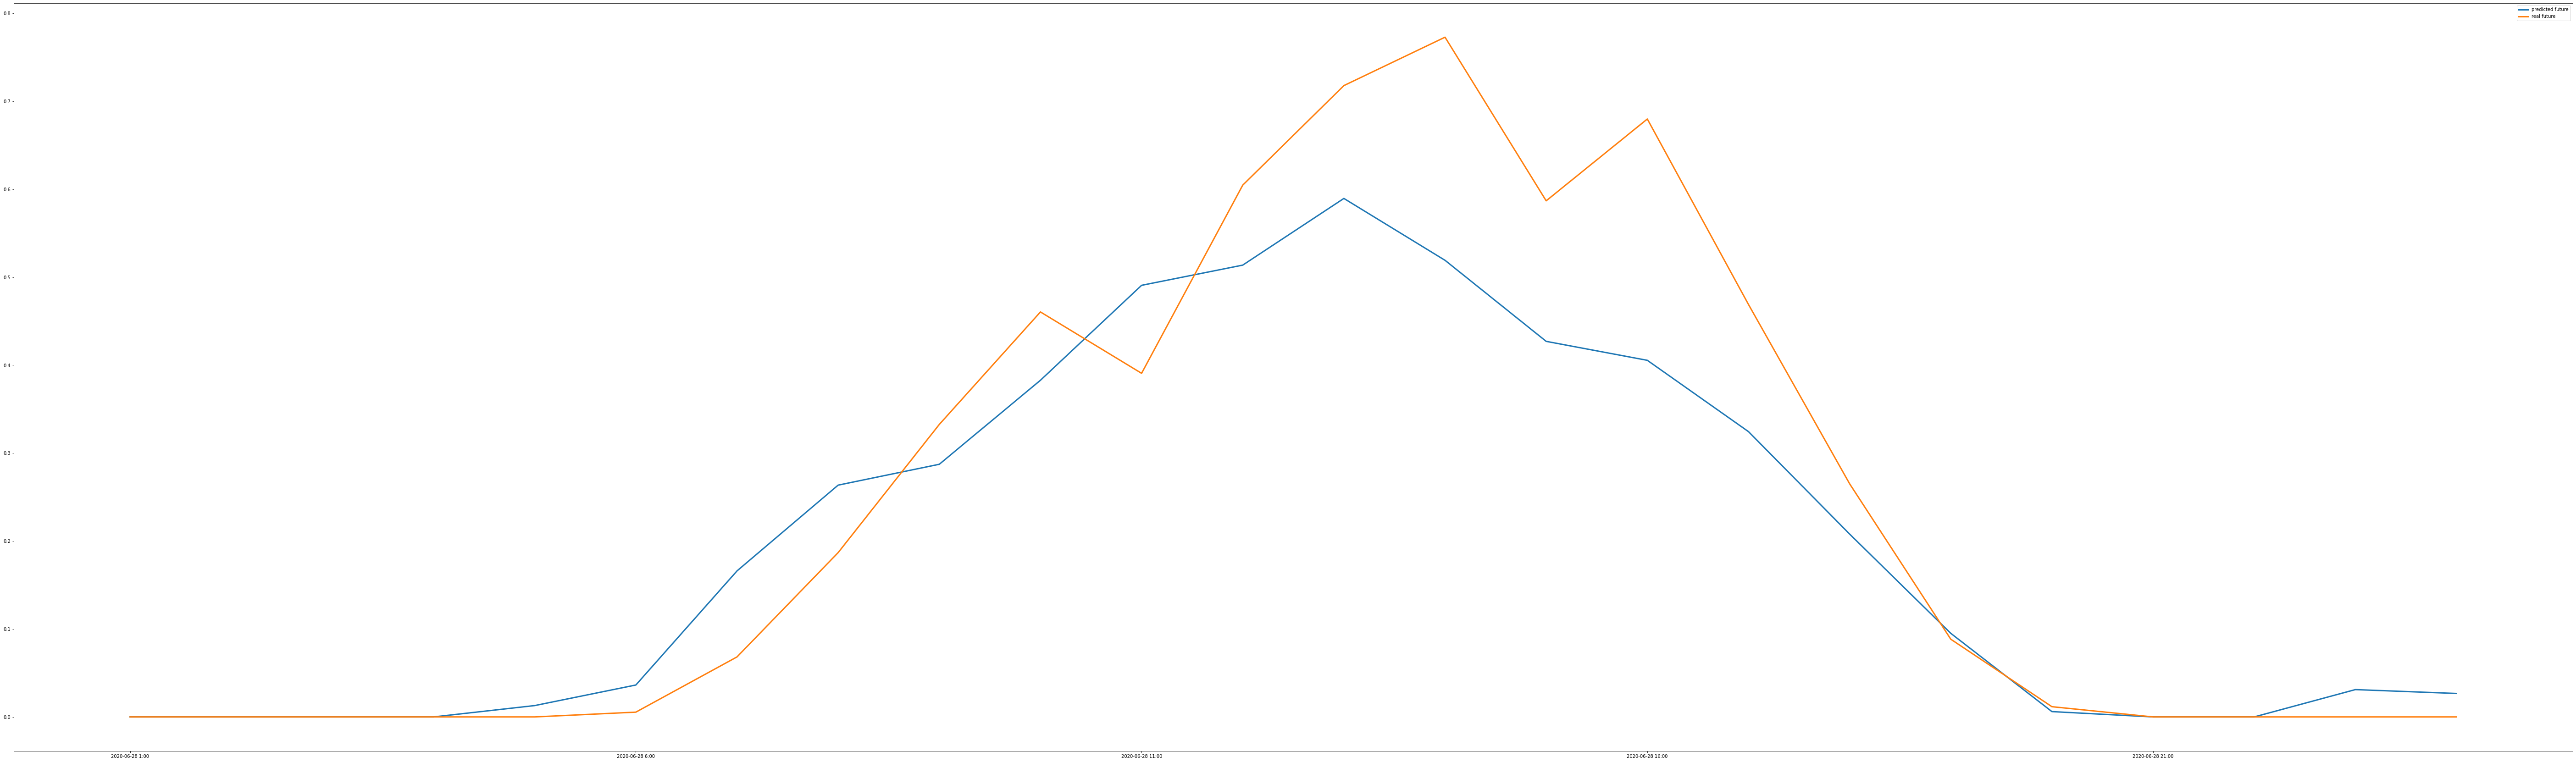

In [162]:
print_model_all(svr_c300_e005_f_r, last_day_weather, last_day_generation)